In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pasighat
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | tongren
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | zalantun
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | ganzhou
Processing Record 9 of Set 1 | svetlyy
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | port-gentil
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | bardiyah
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | havre
Processing Re

Processing Record 37 of Set 4 | tezu
Processing Record 38 of Set 4 | harper
Processing Record 39 of Set 4 | milingimbi
City not found. Skipping...
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | tomatlan
Processing Record 42 of Set 4 | cruden bay
City not found. Skipping...
Processing Record 43 of Set 4 | kasama
Processing Record 44 of Set 4 | sri aman
Processing Record 45 of Set 4 | talnakh
Processing Record 46 of Set 4 | sao filipe
Processing Record 47 of Set 4 | san juan
Processing Record 48 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 49 of Set 4 | okhotsk
Processing Record 50 of Set 4 | lolua
City not found. Skipping...
Processing Record 1 of Set 5 | lavrentiya
Processing Record 2 of Set 5 | synya
Processing Record 3 of Set 5 | lazaro cardenas
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | makakilo city
Processing Record 7 of Set 5

Processing Record 24 of Set 8 | walvis bay
Processing Record 25 of Set 8 | sataua
City not found. Skipping...
Processing Record 26 of Set 8 | addis zemen
City not found. Skipping...
Processing Record 27 of Set 8 | marabba
Processing Record 28 of Set 8 | brae
Processing Record 29 of Set 8 | ondjiva
Processing Record 30 of Set 8 | taxco
Processing Record 31 of Set 8 | maridi
Processing Record 32 of Set 8 | kade
Processing Record 33 of Set 8 | sao joao da barra
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | paita
Processing Record 36 of Set 8 | caramay
Processing Record 37 of Set 8 | fairbanks
Processing Record 38 of Set 8 | vic
Processing Record 39 of Set 8 | vao
Processing Record 40 of Set 8 | smithers
Processing Record 41 of Set 8 | maningrida
Processing Record 42 of Set 8 | morgantown
Processing Record 43 of Set 8 | quelimane
Processing Record 44 of Set 8 | belfast
Processing Record 45 of Set 8 | saint-pierre
Processing Record 46 of Set 8 | olafsvik
Processin

Processing Record 12 of Set 12 | kouroussa
Processing Record 13 of Set 12 | solikamsk
Processing Record 14 of Set 12 | flinders
Processing Record 15 of Set 12 | opuwo
Processing Record 16 of Set 12 | jardim
Processing Record 17 of Set 12 | aykhal
Processing Record 18 of Set 12 | manado
Processing Record 19 of Set 12 | touros
Processing Record 20 of Set 12 | boguchany
Processing Record 21 of Set 12 | saldanha
Processing Record 22 of Set 12 | champerico
Processing Record 23 of Set 12 | rosarito
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | cristalina
Processing Record 26 of Set 12 | chake chake
Processing Record 27 of Set 12 | saleaula
City not found. Skipping...
Processing Record 28 of Set 12 | luwuk
Processing Record 29 of Set 12 | qiongshan
Processing Record 30 of Set 12 | manadhoo
Processing Record 31 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 32 of Set 12 | tetouan
Processing Record 33 of Set 12 | kadykchan
City not found. Skip

In [22]:
len(city_data)

540

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pasighat,28.0667,95.3333,87.80,25,86,3.74,IN,2022-03-20 04:08:19
1,Barrow,71.2906,-156.7887,-12.98,77,0,9.22,US,2022-03-20 04:08:40
2,Tongren,27.7172,109.1853,49.69,90,100,5.19,CN,2022-03-20 04:08:40
3,Busselton,-33.6500,115.3333,78.80,50,100,7.38,AU,2022-03-20 04:08:41
4,Punta Arenas,-53.1500,-70.9167,48.31,66,0,11.50,CL,2022-03-20 04:08:41
5,Zalantun,48.0000,122.7167,27.82,46,82,3.44,CN,2022-03-20 04:08:42
6,Ganzhou,28.8184,115.4327,52.90,87,100,6.13,CN,2022-03-20 04:08:43
7,Svetlyy,54.6750,20.1347,32.97,71,2,5.77,RU,2022-03-20 04:08:43
8,Lebu,-37.6167,-73.6500,54.27,72,100,6.44,CL,2022-03-20 04:08:44
9,Tautira,-17.7333,-149.1500,82.53,73,27,15.05,PF,2022-03-20 04:08:44


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pasighat,IN,2022-03-20 04:08:19,28.0667,95.3333,87.80,25,86,3.74
1,Barrow,US,2022-03-20 04:08:40,71.2906,-156.7887,-12.98,77,0,9.22
2,Tongren,CN,2022-03-20 04:08:40,27.7172,109.1853,49.69,90,100,5.19
3,Busselton,AU,2022-03-20 04:08:41,-33.6500,115.3333,78.80,50,100,7.38
4,Punta Arenas,CL,2022-03-20 04:08:41,-53.1500,-70.9167,48.31,66,0,11.50
...,...,...,...,...,...,...,...,...,...
535,Tortoman,RO,2022-03-20 04:25:51,44.3500,28.2167,25.66,50,0,8.72
536,Linxia,CN,2022-03-20 04:25:52,35.6003,103.2064,50.58,36,66,5.01
537,Mehamn,NO,2022-03-20 04:25:52,71.0357,27.8492,34.38,68,100,29.77
538,Temnikov,RU,2022-03-20 04:25:53,54.6302,43.2148,21.97,97,43,5.77


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

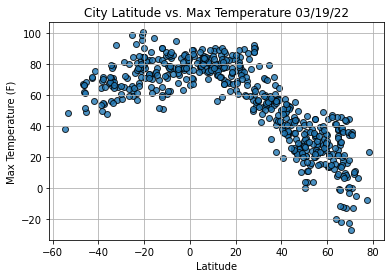

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

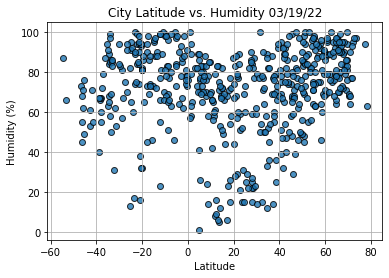

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

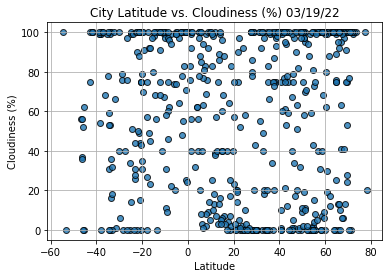

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

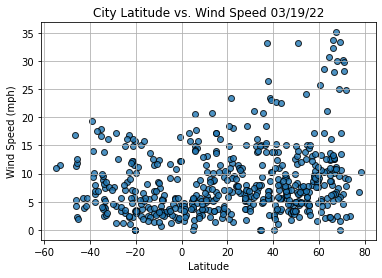

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()